In [20]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [21]:
univ = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Universities.csv")
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [22]:
univ.shape

(25, 7)

In [23]:
# Scale down the data
normalized_data = scale(univ.iloc[:,1:])
normalized_data

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [24]:
# Dendrogram
from scipy.cluster.hierarchy import linkage
a = linkage(normalized_data, method='complete', metric = 'euclidean')

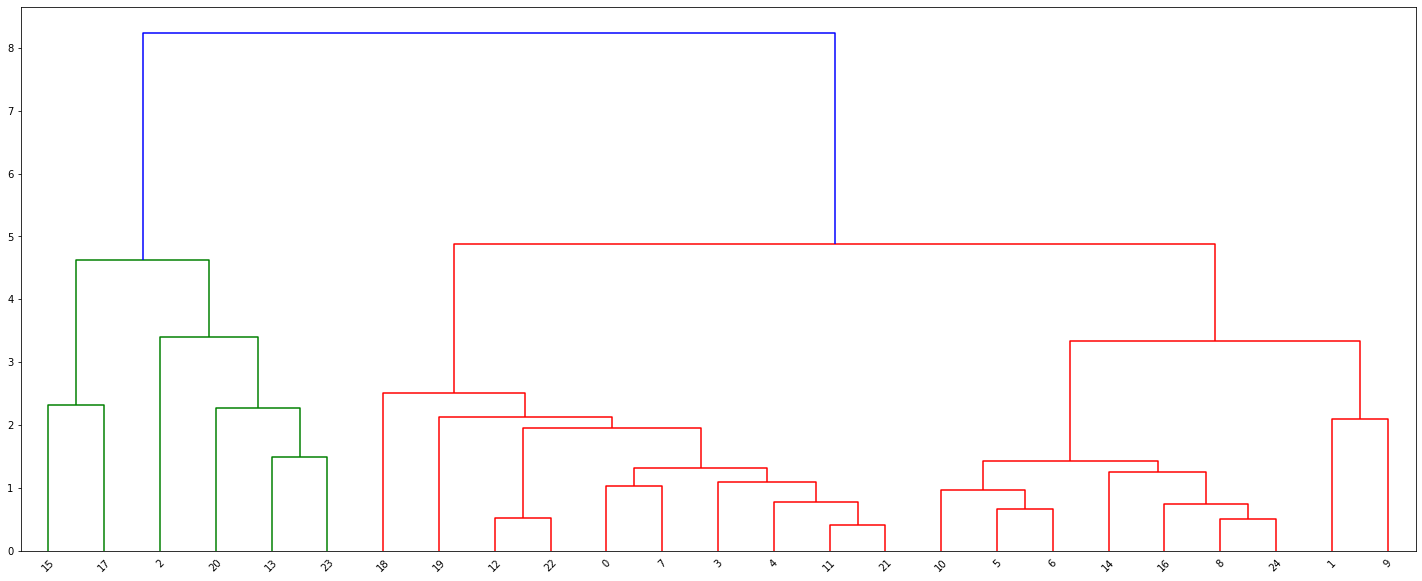

In [25]:
# Dendrogram based on complete linkage
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,10))
sch.dendrogram(a)
plt.show()

In [26]:
# 5 clusters
#  created clusters for our universities
from sklearn.cluster import AgglomerativeClustering
clust = AgglomerativeClustering(n_clusters = 5, linkage='complete',
                                affinity='euclidean').fit(normalized_data)

In [27]:
# Cluster Labels
clust.labels_

array([2, 0, 4, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 3, 0, 1, 0, 1, 2, 2, 3, 2,
       2, 3, 0], dtype=int64)

In [28]:
# Dataframe for cluster labels
cluster = pd.DataFrame(clust.labels_)
cluster

,0
0,2
1,0
2,4
3,2
4,2
5,0
6,0
7,2
8,0
9,0


In [29]:
# Create a new column 'cluster' in Univ Dataset
univ['cluster'] = cluster
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [30]:
univ1 = univ.iloc[:, [7, 0,1,2,3,4,5,6]]
univ1

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,0,CalTech,1415,100,25,6,63575,81
2,4,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90
5,0,Dartmouth,1340,89,23,10,32162,95
6,0,Duke,1315,90,30,12,31585,95
7,2,Georgetown,1255,74,24,12,20126,92
8,0,Harvard,1400,91,14,11,39525,97
9,0,JohnsHopkins,1305,75,44,7,58691,87


In [31]:
# Aggregate the cluster means
univ1.iloc[:,2:].groupby(univ1.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1040.000000,38.500000,78.500000,22.000000,8885.000000,68.000000
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000
3,1115.333333,47.666667,63.666667,16.333333,12504.000000,78.666667
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


In [32]:
# clusters only on graduation rate

### Elbow Method 

In [34]:
# Running KMeans Algorithm multiple times to obtain the feasible K value
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=0)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)
    
wcss
    

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 28.622383307274234]

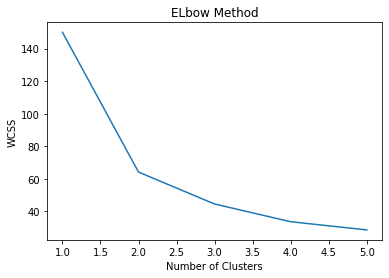

In [35]:
# Plot of wcss Vs K values
plt.plot(range(1,6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()